 # Práctica de aprendizaje automático (parte 4)

# Preparar un modelo de aprendizaje automático para explotación (3 puntos)

Una vez finalizado tus estudios de grado, estás planeando emprender con tu propia startup. Estás considerando tres sectores en los cuales podrías desarrollar un modelo de aprendizaje automático que te permitiría establecer tu empresa en ese ámbito. Los sectores que tienes en mente son:

 - Predicción de las calificaciones ESRB para videojuegos.
 - Predicción de la experiencia de los usuarios de gimnasios.
 - Predicción de adopción de mascotas.

Para ello, se te proporcionan tres conjuntos de datos etiquetados (en la carpeta `data/`) que corresponden a cada sector:

 - pet_adoption_construccion.csv
 - gym_members_expertise_construccion.csv
 - videogame_esrb_ratings_construccion.csv

Tu tarea es entrenar un modelo de aprendizaje automático utilizando **uno** de los datasets proporcionados. Aplica tus conocimientos adquiridos en esta práctica para obtener el mejor modelo posible. 

Una vez que hayas finalizado el modelo, deberás utilizarlo para clasificar los datos del conjunto de explotación correspondiente al dataset elegido. Estos datasets de explotación son similares a los de construcción, pero **la columna de la clase solo tiene NaNs**.

Los conjuntos de datos de explotación (en la carpeta `data/`) son:

 - pet_adoption_explotacion.csv
 - gym_members_expertise_explotacion.csv
 - videogame_esrb_ratings_explotacion.csv

Utilizando el dataset de explotación debes construir un fichero de predicciones. Junto a este notebook debes entregar este fichero. Guarda el fichero de predicciones generado en la carpeta `predicciones/`. Los posibles nombres para este fichero son:

 - pet_adoption_predicciones.csv
 - gym_members_expertise_predicciones.csv
 - videogame_esrb_ratings_predicciones.csv

El nombre de tu fichero dependerá del dataset elegido. **Atención: si se entrega un fichero de predicciones incorrecto no se podrá evaluar**. El fichero a entregar debe tener dos columnas: el ID del ítem ("`id`") y la predicción para ese ítem ("`prediccion`"). Los ficheros de la carpeta `predicciones/`:

 - pet_adoption_ejemplo_fichero_predicciones.csv
 - gym_members_expertise_ejemplo_fichero_predicciones.csv
 - videogame_esrb_ratings_ejemplo_fichero_predicciones.csv

son ejemplos que ya tienen el formato solicitado para el archivo de entrega. Recuerda que el fichero de predicciones entregado debe acabar en **_predicciones.csv** y no en **_ejemplo_fichero_predicciones.csv**.

Recuerda explicar detalladamente los pasos que has seguido, las decisiones que has tomado y las conclusiones obtenidas. Se recomienda el uso de gráficos y tablas para respaldar tus argumentos y resultados (**recuerda incluir las barras de error en las gráficas y el error estándar en las tablas**).

Puedes encontrar información sobre cada dataset en los siguientes archivos (en la carpeta `data/`):

 - pet_adoption_info.txt
 - gym_members_expertise_info.txt
 - videogame_esrb_ratings_info.txt

**Importante**: Debes utilizar uno de los clasificadores con los que se ha trabajado en los apartados previos de la práctica. No está permitido utilizar otros clasificadores ni modelos de paquetes diferentes a **scikit-learn** (sklearn).

**Importante**: Solo se debe entregar un único archivo con todas las predicciones. Si se entregan varios archivos de predicciones para diferentes conjuntos de datos, el corrector automático seleccionará uno al azar. Esto significa que podríais perder toda la puntuación asociada a las predicciones si el archivo elegido no es el correcto Por ello, entregad un único archivo con predicciones.

En cumplimiento con el REGLAMENTO DE EVALUACIÓN ACADÉMICA DE LA ESCUELA POLITÉCNICA SUPERIOR DE LA UNIVERSIDAD DE AUTÓNOMA DE MADRID, artículo 14; "En el caso de copia, la asignatura se puntuará en la convocatoria donde se produjo la copia con cero puntos. Como medida adicional, el profesor puede iniciar un expediente informativo, de acuerdo con el Reglamento de Evaluación de la UAM".

In [1]:
import pandas as pd

In [2]:
datos_construccion = pd.read_csv("./data/pet_adoption_construccion.csv")
datos_explotacion  = pd.read_csv("./data/pet_adoption_explotacion.csv")

In [3]:
datos_construccion.columns

Index(['id', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'Adopted'],
      dtype='object')

In [4]:
datos_explotacion.columns

Index(['id', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'Adopted'],
      dtype='object')

In [5]:
# la columna a predecir es "Adopted"
# si es 1, la mascota fue adoptada
# si es 0, la mascota no ha sido adoptada tovadía

# Esta columna se sabe en el dataset de construcción:
datos_construccion["Adopted"].values[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [6]:
# Sin embargo no se sabe en el dataset de explotación (clientes actuales):
datos_explotacion["Adopted"].values[:10]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

class_label = "Adopted"
id_label = "id"
feature_names = list(datos_construccion.columns)
feature_names.remove(class_label)
feature_names.remove(id_label)
print(feature_names)
X = datos_construccion[feature_names]
y = datos_construccion[class_label].values

ordinales = ['Size'] 
orden_size = [['Small', 'Medium', 'Large']]


nominales = ['PetType', 'Breed', 'Color']

columnas = list(datos_construccion.columns)
numericas = [c for c in columnas if c not in ordinales + nominales + ['id', 'Adopted']]

print("Ordinales:", ordinales)
print("Nominales:", nominales)
print("Numéricas:", numericas)
  
preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(categories=orden_size, handle_unknown='use_encoded_value', unknown_value=-1), ordinales),
        ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominales)
    ],
    remainder='passthrough' 
)

X_transformed = preprocessor.fit_transform(X)

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_transformed)

scaler = StandardScaler()
X_processed = scaler.fit_transform(X_imputed)

knn = KNeighborsClassifier()

knn_params = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

tree = DecisionTreeClassifier()

tree_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

mlp = MLPClassifier(max_iter=3000, early_stopping=True)

mlp_params = {
            'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
            'alpha': [0.0001, 0.01],
            'activation': ['relu', 'tanh']
        }

models = {"KNN":(knn, knn_params), "Tree": (tree, tree_params), "MLP": (mlp, mlp_params)}

results_data = []
best_estimators = {}

for name, (model, params) in models.items():
    print(f"Entrenando y validando {name}...")

    grid = GridSearchCV(model, params, cv=10, scoring='accuracy')
    grid.fit(X_processed, y)
    
    best_estimators[name] = grid
    mean = grid.best_score_
    std = grid.cv_results_['std_test_score'][grid.best_index_]

    print(f"  Mejor accuracy: {mean:.4f} (+/- {std:.4f})")
    print(f"  Mejores hiperparámetros: {grid.best_params_}\n")
    
    results_data.append({
        'Modelo': name,
        'Accuracy': mean,
        'Incertidumbre (Std)': std
    })

df_results = pd.DataFrame(results_data).sort_values(by='Accuracy', ascending=False)
df_results


['PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg', 'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner']
Ordinales: ['Size']
Nominales: ['PetType', 'Breed', 'Color']
Numéricas: ['AgeMonths', 'WeightKg', 'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner']
Entrenando y validando KNN...
  Mejor accuracy: 0.7854 (+/- 0.0247)
  Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}

Entrenando y validando Tree...
  Mejor accuracy: 0.9366 (+/- 0.0119)
  Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}

Entrenando y validando MLP...
  Mejor accuracy: 0.8647 (+/- 0.0546)
  Mejores hiperparámetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}



,Modelo,Accuracy,Incertidumbre (Std)
1,Tree,0.936563,0.011915
2,MLP,0.864719,0.054569
0,KNN,0.785411,0.024739


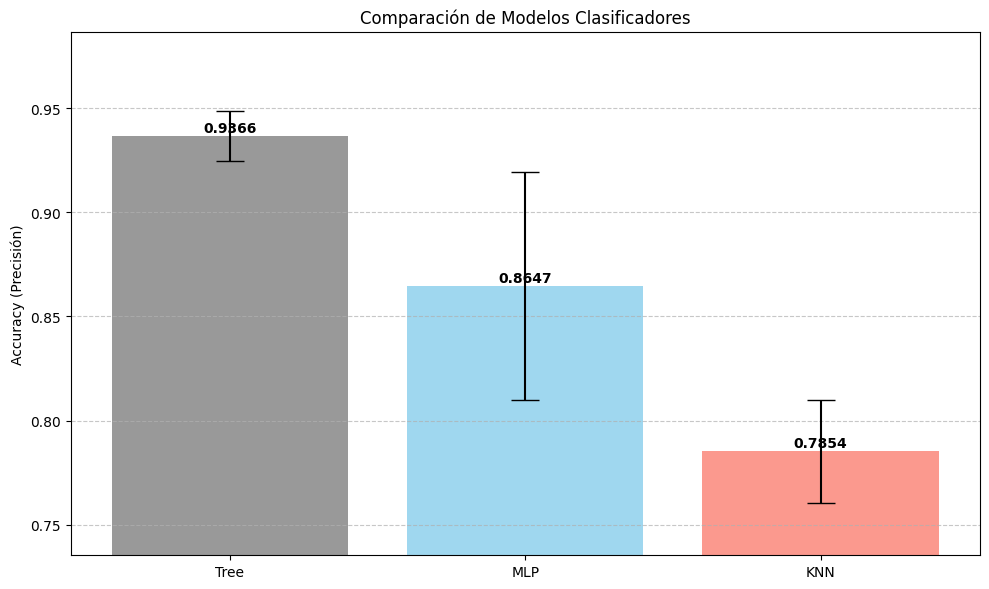

In [8]:
import matplotlib.pyplot as plt

names = df_results['Modelo']
results_mean = df_results['Accuracy']
results_std = df_results['Incertidumbre (Std)']

plt.figure(figsize=(10, 6))
colors = ['gray', 'skyblue', 'salmon']

plt.bar(names, results_mean, yerr=results_std, capsize=10, color=colors, alpha=0.8)

plt.ylabel('Accuracy (Precisión)')
plt.title('Comparación de Modelos Clasificadores')
plt.ylim(results_mean.min() - 0.05, results_mean.max() + 0.05) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='center')

for i, v in enumerate(results_mean):
    plt.text(i, v + 0.002, f"{v:.4f}", ha='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [10]:
modelo_final = best_estimators[df_results.iloc[0]['Modelo']].best_estimator_
print(f"Modelo seleccionado para generar predicciones: {modelo_final}")


X_explotacion = datos_explotacion[feature_names]

X_expl_transformed = preprocessor.transform(X_explotacion)

X_expl_imputed = imputer.transform(X_expl_transformed)

X_expl_processed = scaler.transform(X_expl_imputed)

predicciones_finales = modelo_final.predict(X_expl_processed)

ids = pd.read_csv("./data/pet_adoption_explotacion.csv")["id"]

df_predicciones = pd.DataFrame({
    'id': ids,
    'prediccion': predicciones_finales
})

df_predicciones.to_csv("predicciones/pet_adoption_predicciones.csv", index=False)

print("Predicciones guardadas")

Modelo seleccionado para generar predicciones: DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=10)
Predicciones guardadas
